In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

608

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | nagapattinam
Processing Record 2 of Set 1 | praxedis guerrero
Processing Record 3 of Set 1 | paamiut
Processing Record 4 of Set 1 | khatanga
Processing Record 5 of Set 1 | saskylakh
Processing Record 6 of Set 1 | san cristobal
Processing Record 7 of Set 1 | east london
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | kuala pilah
Processing Record 10 of Set 1 | hithadhoo
Processing Record 11 of Set 1 | andilamena
Processing Record 12 of Set 1 | saint marys
Processing Record 13 of Set 1 | sinnamary
Processing Record 14 of Set 1 | bluff
Processing Record 15 of Set 1 | bambous virieux
Processing Record 16 of Set 1 | altay
Processing Record 17 of Set 1 | severo-kurilsk
Processing Record 18 of Set 1 | saldanha
Processing Record 19 of Set 1 | komsomolskiy
Processing Record 20 of Set 1 | cape town
Processing Record 21 of Set 1 | busselton
Processing Record 22 of Set 1 | leningradskiy

City not found. Skipping...
Processing Record 41 of Set 4 | mana
Processing Record 42 of Set 4 | lata
Processing Record 43 of Set 4 | kaeo
Processing Record 44 of Set 4 | haines junction
Processing Record 45 of Set 4 | ostrovnoy
Processing Record 46 of Set 4 | amderma
City not found. Skipping...
Processing Record 47 of Set 4 | tautira
Processing Record 48 of Set 4 | taoudenni
Processing Record 49 of Set 4 | sainte-rose
Processing Record 50 of Set 4 | avarua
Processing Record 1 of Set 5 | padang
Processing Record 2 of Set 5 | plouzane
Processing Record 3 of Set 5 | lukovetskiy
Processing Record 4 of Set 5 | mys shmidta
City not found. Skipping...
Processing Record 5 of Set 5 | calama
Processing Record 6 of Set 5 | nynashamn
Processing Record 7 of Set 5 | aksha
Processing Record 8 of Set 5 | gizo
Processing Record 9 of Set 5 | galveston
Processing Record 10 of Set 5 | alihe
Processing Record 11 of Set 5 | rassvet
Processing Record 12 of Set 5 | porto empedocle
Processing Record 13 of Set

Processing Record 28 of Set 8 | ayan
Processing Record 29 of Set 8 | amazar
Processing Record 30 of Set 8 | hervey bay
Processing Record 31 of Set 8 | mizdah
Processing Record 32 of Set 8 | half moon bay
Processing Record 33 of Set 8 | dzhusaly
City not found. Skipping...
Processing Record 34 of Set 8 | rio gallegos
Processing Record 35 of Set 8 | flinders
Processing Record 36 of Set 8 | qasigiannguit
Processing Record 37 of Set 8 | santa cruz
Processing Record 38 of Set 8 | kegayli
City not found. Skipping...
Processing Record 39 of Set 8 | boshnyakovo
Processing Record 40 of Set 8 | west lorne
Processing Record 41 of Set 8 | teacapan
Processing Record 42 of Set 8 | georgetown
Processing Record 43 of Set 8 | lahaina
Processing Record 44 of Set 8 | ancud
Processing Record 45 of Set 8 | san lazaro
Processing Record 46 of Set 8 | kapuvar
Processing Record 47 of Set 8 | otofuke
Processing Record 48 of Set 8 | simav
Processing Record 49 of Set 8 | aiquile
Processing Record 50 of Set 8 | to

Processing Record 17 of Set 12 | garden city
Processing Record 18 of Set 12 | kuche
City not found. Skipping...
Processing Record 19 of Set 12 | poum
Processing Record 20 of Set 12 | sa kaeo
Processing Record 21 of Set 12 | durango
Processing Record 22 of Set 12 | fare
Processing Record 23 of Set 12 | donskoye
Processing Record 24 of Set 12 | victoria
Processing Record 25 of Set 12 | forrest city
Processing Record 26 of Set 12 | rosa zarate
Processing Record 27 of Set 12 | rantepao
Processing Record 28 of Set 12 | puchezh
Processing Record 29 of Set 12 | maumere
Processing Record 30 of Set 12 | auki
Processing Record 31 of Set 12 | iqaluit
Processing Record 32 of Set 12 | biltine
Processing Record 33 of Set 12 | zalegoshch
Processing Record 34 of Set 12 | vallenar
Processing Record 35 of Set 12 | takoradi
Processing Record 36 of Set 12 | sturgis
Processing Record 37 of Set 12 | morondava
Processing Record 38 of Set 12 | katherine
Processing Record 39 of Set 12 | karratha
Processing Rec

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Nagapattinam,10.7667,79.8333,79.36,81,100,9.73,IN,2021-07-14 20:34:11
1,Praxedis Guerrero,31.3667,-106.0167,96.53,20,4,3.98,MX,2021-07-14 20:34:12
2,Paamiut,61.9940,-49.6678,43.02,96,87,8.25,GL,2021-07-14 20:32:05
3,Khatanga,71.9667,102.5000,46.40,61,100,16.08,RU,2021-07-14 20:30:26
4,Saskylakh,71.9167,114.0833,44.10,68,100,17.18,RU,2021-07-14 20:30:29
5,San Cristobal,7.7669,-72.2250,82.58,48,28,6.71,VE,2021-07-14 20:34:12
6,East London,-33.0153,27.9116,55.27,60,0,7.94,ZA,2021-07-14 20:30:28
7,Ushuaia,-54.8000,-68.3000,31.66,80,75,4.61,AR,2021-07-14 20:26:22
8,Kuala Pilah,2.7389,102.2487,74.35,89,100,3.38,MY,2021-07-14 20:34:13
9,Hithadhoo,-0.6000,73.0833,82.24,75,100,8.66,MV,2021-07-14 20:30:32


In [15]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Nagapattinam,IN,2021-07-14 20:34:11,10.7667,79.8333,79.36,81,100,9.73
1,Praxedis Guerrero,MX,2021-07-14 20:34:12,31.3667,-106.0167,96.53,20,4,3.98
2,Paamiut,GL,2021-07-14 20:32:05,61.9940,-49.6678,43.02,96,87,8.25
3,Khatanga,RU,2021-07-14 20:30:26,71.9667,102.5000,46.40,61,100,16.08
4,Saskylakh,RU,2021-07-14 20:30:29,71.9167,114.0833,44.10,68,100,17.18
5,San Cristobal,VE,2021-07-14 20:34:12,7.7669,-72.2250,82.58,48,28,6.71
6,East London,ZA,2021-07-14 20:30:28,-33.0153,27.9116,55.27,60,0,7.94
7,Ushuaia,AR,2021-07-14 20:26:22,-54.8000,-68.3000,31.66,80,75,4.61
8,Kuala Pilah,MY,2021-07-14 20:34:13,2.7389,102.2487,74.35,89,100,3.38
9,Hithadhoo,MV,2021-07-14 20:30:32,-0.6000,73.0833,82.24,75,100,8.66


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

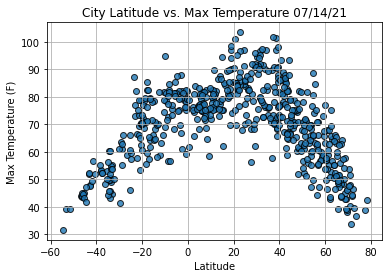

In [22]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

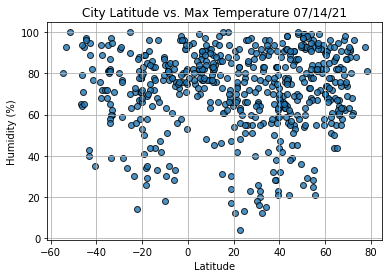

In [26]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

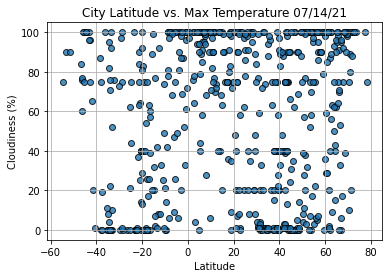

In [27]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

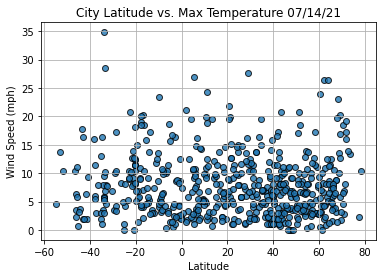

In [28]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

In [39]:
#Import linregress
from scipy.stats import linregress

#Create a function to perform linear regression on the weather data and plot a regression line with the equation
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    #Run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    #Calculate the regression line "y values" from the slope and intercept
    regress_values = x_values * slope + intercept
    #Get the equation of the line
    line_eq = "y = " + str(round(slope,2)) + "x + " +str(round(intercept,2))
    
    #Create a scatter plot and plot the regression line
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    
    #Annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [43]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

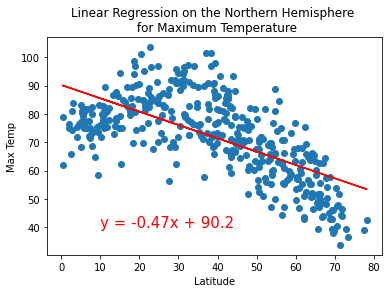

In [57]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

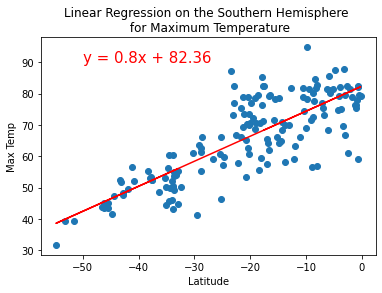

In [56]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

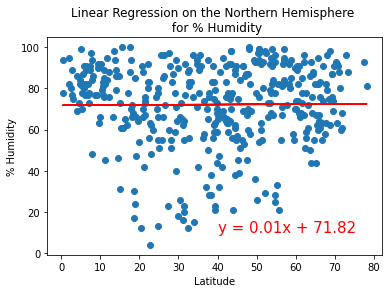

In [62]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

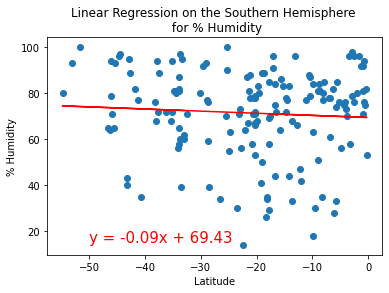

In [63]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

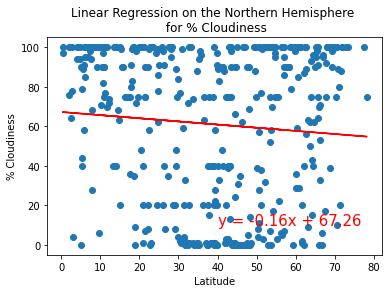

In [65]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(40,10))

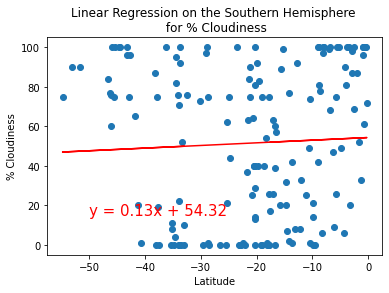

In [66]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,15))

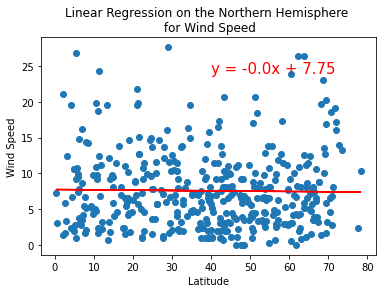

In [72]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,24))

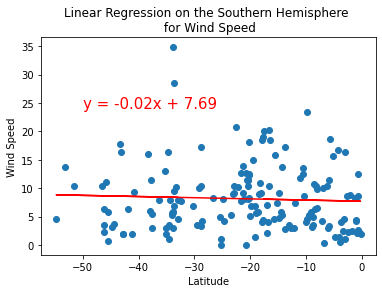

In [74]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,24))